# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
# Mounting Google Colab drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [2]:
import random

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

import tensorflow as tf

from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, BatchNormalization

from keras.losses import categorical_crossentropy

from keras.optimizers import Adam

from keras.utils import to_categorical

from keras import backend

backend.clear_session()

**Let us check the version of tensorflow.**

In [3]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
import h5py #This python library is used for opening HDF5 files
file_path = '/content/drive/MyDrive/MIT/elective/data/SVHN_single_grey1.h5'

with h5py.File(file_path, 'r') as f:
    # The  funtion list(f.keys()) provides the list of keys at the root level in the file.
    # We can now take a look at how the dataset is organized.
    # In the file the key are equivalent to pandas columns.
    print(list(f.keys()))
    X_train = f['X_train'][:]
    y_train = f['y_train'][:]
    X_test = f['X_test'][:]
    y_test = f['y_test'][:]

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [5]:
len(X_train), len(X_test)


(42000, 18000)

In [6]:
# If we look inside the training set X_train, we can see what is inside the dataset.
print(X_train[0])
# We can also determine the length of each image in the training set of X_train
print(len(X_train[0]))

[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]
32


**Observation:**
The dataset contains 42,000 images in the Training set and 18,000 images in the Testing set. Each image is a 32x32 matrix of numbers, consisting of the values of the individual pixels.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

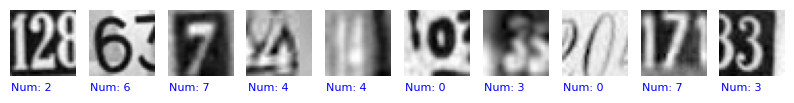

In [7]:
# The images are in matrix format, hence we can use the "figure" function from Matplotlib to plot them.
# This function plots the individual pixes within each matrix for the visualization of the images.
plt.figure(figsize = (10, 1))

# Let's plot the first 10 matrices (images) in the dataset.
for i in range(10):

    # For the subplot we have 1 row with 10 columns and we iterate for each of the 10 images.
    plt.subplot(1, 10, i+1)

    # As we iterate, We insert each image onto the canvas and display it and we use the color map "gray'.
    # Note: The colors are not the actual colors within the image, they only represent the differences of the numbers within the matrix.
    plt.imshow(X_train[i], cmap='gray')

    # To display the image better, we can turn the axis off.
    plt.axis('off')

    # The Y_train dataset contains the labels corresponding to each image in the X_train dataset.
    # We can display these labels for each image.
    plt.text(10, 40, f'Num: {y_train[i]}', ha='center', va='bottom', color='blue', fontsize=8)
# Plots the result of the for loop.
plt.show()

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Print the shapes of Training and Test data

In [8]:
# This prints the first dataset which is 32 pixels by 32 pixels, that is a matrix of 1024 pixels.
# For color images i.e. that are in rgb, we have additionally channels, and each channel consists of a 32x32 matrix of pixels.
# For the current black and white images, we have a grayscale ranging from 0 to 255, 0 being black and 255 being white.
print("Shape:", X_train[0].shape)

Shape: (32, 32)


In [9]:
# Let's review the matrix of the first image in the training dataset.
print("First image:\n", X_train[0])

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [10]:
# We will flatten the 32x32 matrix dataset by using the reshape function fom numpy.
# We will create a  one dimensional array while preserving the data.
X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

In [11]:
# Let's now print the shape of the Training and Test data sets after the reshape.
print("Shape of Training dataset:", X_train.shape, y_train.shape)
print("Shape of Test dataset:", X_test.shape, y_test.shape)

Shape of Training dataset: (42000, 1024) (42000,)
Shape of Test dataset: (18000, 1024) (18000,)


**Observation:** We can now see that the training dataset still has 42,000 images and the test dataset has 18,000 images. However each image is now a 1-dimensional matrix of 1024 numbers.

### **Normalize the train and the test data**

In [12]:
# We will now normalize the data, which basically fits all the data in a range from 0 to 1.
# We will normalized by dividig each of the values by 255.

# Normalize reshaped training dataset
X_train_normalized = X_train / 255.0

# Normalize reshaped testing dataset
X_test_normalized = X_test / 255.0

### **One-hot encode output**

In [13]:
# We now convert the integer class labels in the y_train dataset to a binary class matrix
# Each label is then represented as a vector of 0s and 1s.
# The to_categorical function from the tensorflow.keras.utils module converts the numerical values to one-hot encoded vectors.

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

In [14]:
# Print the labels from the test dataset that are now in one-hot encoded format.

print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


**Observation:** We can see here that the first label from the test dataset
[0,1,0,0,0,0,0,0,0,0] which has been "one-hot encoded" represents the number 2.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [19]:
# We need to now set up a seed for the random number generator and it should be the same for all random generators.
# One sees that quite often the seed "42" is used, since it was considered the answer to the ultimate question in life
# from Douglas Adam's Hitchiker's Guide to the Galaxy. It is just a choice of the geeks.
# But one can use any seed.

# Use the same seed for Numpy, Python function, and Tensorflow

# In NumPy
np.random.seed(42)

# In the generic python funcion
random.seed(42)

# In TensorFlow
tf.random.set_seed(42)

def seed_setup():
  np.random.seed(42)
  random.seed(42)
  tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [17]:
input_shape = 1024 # the 32x32 images
num_classes = 10 # the different categories of images that we have in the dataset (0,1,2,3,4,5,6,7,8,9)

def nn_model_1(input_shape, num_classes):
    # This creates a Sequential Model. This is a simple model where we have one tensor as input and one tensor as output
    model = Sequential()

    # We create a first hidden layer with 64 nodes and ReLU activation as per model architecture
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))

    # We the create a second hidden layer with 32 nodes and ReLU activation as per the model architecture.
    model.add(Dense(32, activation='relu'))

    # The final output layer we use with 'softmax' activation and the number of nodes is equal to the total number of classes
    model.add(Dense(num_classes, activation='softmax'))

    # We will compile the model using categorical crossentropy whch is a commonly used loss function for multi-class classification problems
    # where each sample belongs to exactly one class out of two or more classes, like in our case.
    # We will also use the Adam optimizer with a learning rate of 0.001 and metrics = 'accuracy' as per the model architecture
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Let's go ahead and create the model
model = nn_model_1(input_shape, num_classes)

# We will print a summary of the model
model.summary()

# Let's fit the model on the train data with a validation split of 0.2
# batch size = 128, verbose = 1, and epochs = 20 as per the instructions
history = model.fit(X_train_normalized, y_train,
                    validation_split=0.2,
                    batch_size=128,
                    verbose=1,
                    epochs=20)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                65600     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 2.2915 - accuracy: 0.1121 - val_loss: 2.2416 - val_accuracy: 0.1281
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.0751 - accuracy: 0.2208 - val_loss: 1.8394 - val_accuracy: 0.3493
Epoch 3/20
263/263 [==========

### **Plot the Training and Validation Accuracies and write down your Observations.**

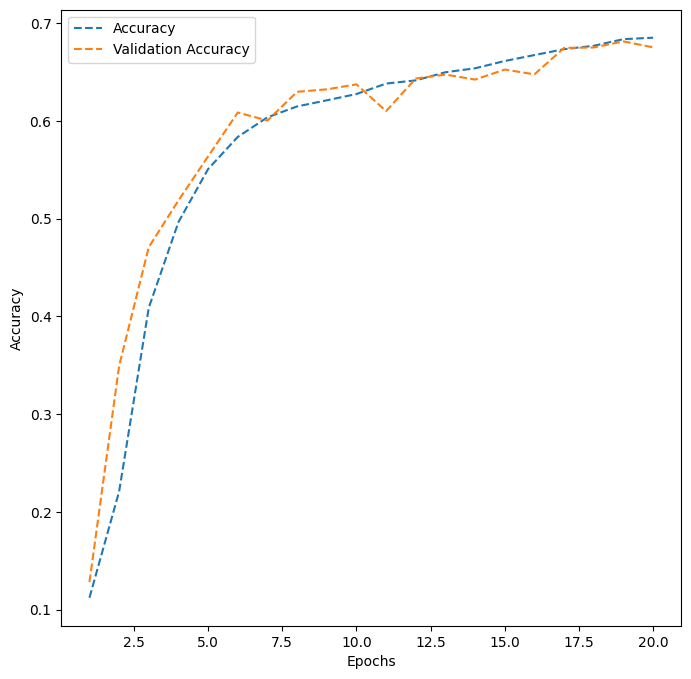

In [18]:
# Let's now plot the training and validation accuracies.

# Here we extract the training history from the Keras model and store it in a dictionary.
# Since dictionaries in python are pairs of key-values.
dict_hist = history.history

# This creates a list of all the epochs
list_ep = [i for i in range(1, 21)]

# We can now creates an area to plot the graph using MatPlotLib
plt.figure(figsize = (8, 8))

# Let's now plot the Accuracy in Blue
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'Accuracy')

# We will now plot the second line 'Validation Accuracy' in Yellow
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'Validation Accuracy')

# We will set the label for the Y-axis as 'Accuracy'
plt.ylabel('Accuracy')

# We will set the label for the X-axis as 'Epochs'
plt.xlabel('Epochs')

# Let's also set the legend for the graph
plt.legend()

# Finally let's now plot the actual graph
plt.show()

**Observations:**

**1. Initial Training: Epochs 1-4:**

Smooth Increase with no Overfitting: Both the training accuracy and validation accuracy increase smoothly suggesting that in the first epochs, the model is learning quite well from the training data. The slight gap between the training accuracy and the validation accuracy suggests that the model is not overfitting the training data, since the validation accuracy is slightly different from the training accuracy.

**2. Plateauing: Epochs 5-14:**

The turning and plateauing of the validation accuracy and the training accuracy from around Epoch 6 suggests that the model is encountering some difficulty in learning after a certain point. The fact that the validation accuracy is higher than the training accuracy after Epoch 6 is a positive and it suggests that the model is able to potentially generalize well to data that it has not seen before.

The accuracy of between 0.5 and 0.65 indicates that the model is performing at not with such a great confidence, and is struggling to recognize patterns from the data. This could be due to minimal training data, or suboptimal hyperparameters, or insufficient model complexity, .

**3. Convergence and Fragmentation: Epochs 15-20:**

The fragmentation in the validation accuracy line from Epoch 15 indicates perhaps that the model is starting to overfit the training data. It could also be due to noise within the training dataset.

The intersection of the validation accuracy and the training accuracy followed by convergence could indicate that the model is now fitting the training data too closely and this can lead to overfitting.

**4. Potential Improvements:**

Early Stopping: When the model starts to overfit, it may be beneficial to stop the training early in order to prevent overfitting. Since the model only has accuracy of around 0.60, which does not provide high predictability, stopping the training early will not improve accuracy.

Model Complexity: Modifying or adjusting the complexity of the model might also help improve the predictability. If the model is too simple, it might not be able to recognize the patterns in the data. On the other hand, danger with a complex model is that it might lead to overfitting. This is a balance and requires testing to identify which is the best approach.

Data Quality: The quality of the data is important and it is important to make sure that the training and validation datasets represent the actual dataset and are free from noise.

Hyperparameter Tuning: It is also important to test with different hyperparameter settings, for example, the learning rate, etc to determine the optimal values that make the model prediction better.

In summary, although at the beginning the training looked quite good, the plateauing and convergence with a drop in validation accuracy indicates that further refinemenets are require to prevent overfitting and improve the predictability. Since the model predictability is quite low, I would suggest to consider testing and fine-tuning the model. However, with such a low accuracy and overfitting happening so quickly, I would consider to replace this model and focus on a different approach. I would reject this model and look at another model that can improve the accuracy level.

We will look at using a model with higher complexity and see if that improves the performance of the model.

Before we do that, we also need to clear the previous model's history from the Keras backend. We also need to fix the seed after clearing the Keras backend.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [20]:
# Let's clear the Keras backend
backend.clear_session()

# Let's also reset the seed
seed_setup()


### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [21]:
input_shape = 1024 # the 32x32 images
num_classes = 10 # the different categories of images that we have in the dataset (0, 1,2,3,4,5,6,7,8,9,0)

def nn_model_2(input_shape, num_classes):
    # This creates a Sequential Model
    model = Sequential()

    # We create a first hidden layer with 256 nodes and ReLU activation as per model architecture
    model.add(Dense(256, activation='relu', input_shape=(input_shape,)))

    # We then create a second hidden layer with 128 nodes and ReLU activation as per the model architecture
    model.add(Dense(128, activation='relu'))

    # We now add a dropout layer with a rate equual to 0.2
    model.add(Dropout(0.2))

    # We now create a third hidden layer with 64 nodes and ReLU activation as per the model architecture
    model.add(Dense(64, activation='relu'))

    # We now create a fourth hidden layer with 64 nodes and ReLU activation as per the model architecture
    model.add(Dense(64, activation='relu'))

    # We now create a fifth hidden layer with 32 nodes and ReLU activation as per the model architecture
    model.add(Dense(32, activation='relu'))

    # We now add a BatchNormalization layer as per the model architecture
    model.add(BatchNormalization())

    # Finally, we add an output layer with 'softmax' activation and number of nodes equal to the total number of classes
    model.add(Dense(num_classes, activation='softmax'))


    # We will compile the model using categorical crossentropy
    # We will also use the Adam optimizer with a learning rate of 0.005 and metrics = 'accuracy' as per the model architecture
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0005),
                  metrics=['accuracy'])

    return model

# Let's go ahead and create the model
model_2 = nn_model_2(input_shape, num_classes)

# Let's go ahead and print a summary of the model
model_2.summary()

# Let's fit the model on the train data with a validation split of 0.2
# batch size = 128, verbose = 1, and epochs = 30 as per the instructions
history = model_2.fit(X_train_normalized, y_train,
                    validation_split=0.2,
                    batch_size=128,
                    verbose=1,
                    epochs=30)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

### **Plot the Training and Validation Accuracies and write down your Observations.**

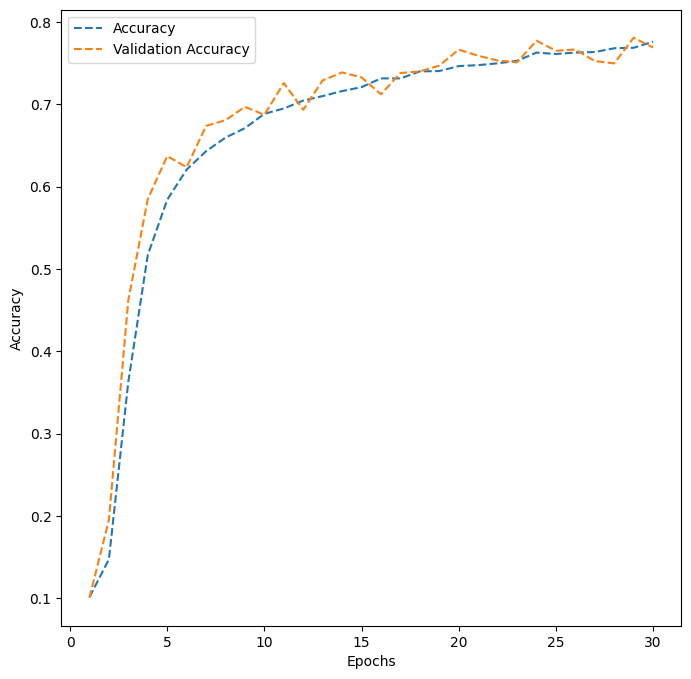

In [22]:
# Let's now plot the training and validation accuracies.

# As we did before, we extract the training history from the Keras model and store it in a dictionary.
dict_hist = history.history

# Let's create a list of all the epochs to run through
list_ep = [i for i in range(1, 31)]

# We can now create an area to plot the graph using MatPlotLib
plt.figure(figsize = (8, 8))

# Let's now plot the Accuracy in Blue
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'Accuracy')

# We will now plot the second line 'Validation Accuracy' in Yellow
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'Validation Accuracy')

# We will set the label for the Y-axis as 'Accuracy'
plt.ylabel('Accuracy')

# We will set the label for the X-axis as 'Epochs'
plt.xlabel('Epochs')

# Let's also set a legend for the graph
plt.legend()

# Finally let's now plot the actual graph
plt.show()

**Observations:**

We can see here that the accuracy of the model has increased from before, however, the model still seems to be slightly overfitting the data.

We can see that the training accuracy increases all the way to Epoch 10 to 11 before it starts to plateau. We also see that the validation accuracy is is higher than training accuracy but is somewhat segmented. This suggests that the model may not be generalizing so well.

There could be a couple of different explanations for this:

1.   The model is perhaps too complex with too many layers and may be  overfitting slightly.
2.   The model is perhaps very sensitive to changes in the validation data.
3.   The modelmay be producing more noise data.

Overall the accuracy of the model with the complexity, has only improved slightly and is around 0.65. So, adding more complexity to the ANN model has not improved the model predictability significantly. For now, I would also reject this model and see if we can improve with a different approach.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [23]:
# Let's now use the .predict method to make our predictions
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 4ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [24]:
# Converts the original labels back from the matrix coded by one-hot-encoding.
y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.89      0.64      0.74      1814
           1       0.57      0.71      0.64      1828
           2       0.58      0.79      0.67      1803
           3       0.70      0.66      0.68      1719
           4       0.75      0.77      0.76      1812
           5       0.70      0.67      0.68      1768
           6       0.78      0.67      0.72      1832
           7       0.72      0.74      0.73      1808
           8       0.66      0.63      0.65      1812
           9       0.70      0.62      0.65      1804

    accuracy                           0.69     18000
   macro avg       0.70      0.69      0.69     18000
weighted avg       0.70      0.69      0.69     18000



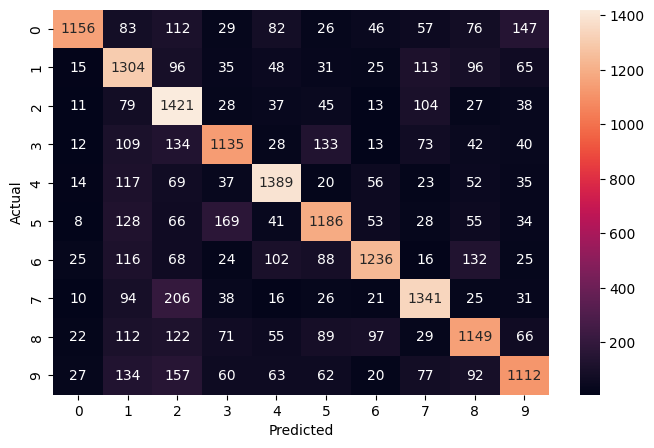

In [27]:
# We will now print the classification report using the sklearn method
print(classification_report(y_test, test_pred))

# We will plot the heatmap using confusion matrix another sklearn method
cm = confusion_matrix(y_test, test_pred)

# Let's plot the confusion matrix
plt.figure(figsize = (8, 5))

# We can use the seaborn library to display the heatmap
sns.heatmap(cm, annot = True,  fmt = '.0f')

# Let's assigns the 'Actual' label to the Y-axis
plt.ylabel('Actual')

# Let's assign the 'Predicted' label to the X-axis
plt.xlabel('Predicted')

# Finally, let's plot the result.
plt.show()

**Final Observations:__________**

Observations from the confusion matrix:
1. Precision is 70% (macro average) which is the ratio of true positive predictions to the total number of predicted positive.
Precision is relatively high for classes 0, 3, 4, 5, 6, 7, and 9, this indicates that when the model predicts these classes, it often is correct. Classes 0, 4, and 6, in particular, have high precision values (0.89, 0.75 and 0.78, respectively).
Precision is lower for classes 1, 2, and 8, this indicates that the model is has more false positives for these classes. In these cases, the model identifies an image as a certain number, but it actually is a mistake.




2. Recall was 69% (macro average) and it measures the ratio of true positive predictions to the total number of actual number images. This measures how many of the actual true images are correctly predicted. We can see that, Recall is quite high for classes 1, 2, 4, and 7, this suggests that the model is able to capture a significant proportion of true predictions for these classes.
However, we notice that, Recall is lower for classes 0, 3, 5, 6, 8, and 9, implying that the model misses identifying correctly for quite a few classes.




3. The F1-score is a harmonic mean of precision and recall. It provides a balance between precision and recall.
We can see that the F1-scores are generally in the range of 0.64 to 0.76, with higher values for classes 0, 4, 6, and 7.




4. The overall accuracy is 0.69, indicating that the model was able to correctly predict the class labels for 69% of the images in the test dataset.


5. Macro-Average and Weighted-Average: The macro-averaged precision, recall, and F1-score are around 0.70, this suggests balanced performance across all classes when each class is given equal weight.
The weighted average taking into account class imbalances is also around 0.70.

**Key Takeaways:**

The model performs well for some classes such as: 0, 4, 6 but not so well for some other class such as: 1, 2, 8.
Macro and weighted averages provide a more comprehensive view of the overall performance and therefore class imbalances should be taken into account.


When analyzing the current model's performance, it is important to balance between precision and recall. For example, if false positives are more important, precision then is an important measure to take into account.
We can see here that this model seems to be misclassifying around 31% of the times.


In summary, the model performance has improved, but still the predicability seems to be not so great with almost 31% of misclassifications. So, there seems to be some more possibility for improvement. Exploring further fine tuning, or considering a different model architecture like a Convolutional Neural Network which may be better suited for image data may help improve predictability for some classes. So for now, I would suggest rejecting this model and look for another model.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [28]:
# Load the hdf5 file
with h5py.File(file_path, 'r') as f:
    print(list(f.keys()))
    X_train = f['X_train'][:]
    y_train = f['y_train'][:]
    X_test = f['X_test'][:]
    y_test = f['y_test'][:]

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [29]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
This confirms that the dataset is loaded correctly and has the same number of images


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [30]:
print("Shape:", X_train[0].shape)

print("First image:\n", X_train[0])

Shape: (32, 32)
First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [31]:
# For CNN we need to always have a 4D array as input,so therefore we need to reshape the arrays

# 4D array:
# 1 Batch size
# 2 Height of the image
# 3 Width of the image
# 4 Number of channels (e.g., 3 for RGB or 1 for grayscale)

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [32]:
# Let's normalize the inputs from 0-255 to 0-1 as we did before

X_train = X_train / 255.0

X_test = X_test / 255.0

Print New shape of Training and Test

In [33]:
# Let's take a look at how the new shape looks like for the Training dataset and the Test dataset:
print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [34]:
# Let's turn the y_train and y-test variables into a matrix that is one-hot encoded

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

In [36]:
# Print the converted matrix
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


**Observation:**
The dataset is now ready to be used in a Convolutional Neural Network Model


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [37]:
# Let's use the seed setup function to reset and create all the seeds
seed_setup()

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [38]:
# Let's importing the libraries required for a CNN Model
from keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

def cnn_model_1():
    model = Sequential()

    # First Convolutional layer as per Model Architecture
    # Let's add a first Convolutional layer with 16 filters and a kernel size of 3x3.
    # Let's set the padding as 'same' and provide the input shape = (32, 32, 1)
    # We will also add a LeakyRelu layer with the slope equal to 0.1
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))

    # Second Convolutional layer as per Model Architecture
    # Let's add a second Convolutional layer with 32 filters and a kernel size of 3x3
    # Let's set the pading as 'same'
    # We will also add another LeakyRelu with the slope equal to 0.1
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))

    # Max-pooling layer as per Model Architecture
    # Let's add a max-pooling layer with a pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Let's flatten the output from the previous layer as per Model instructtion
    model.add(Flatten())

    # Let's add a dense layer with 32 nodes as per Model instruction
    # Let's also add a LeakyRelu layer with the slope equal to 0.1
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))

    # Output layer as per Model Architecture
    # Let's add a final output layer with nodes equal to the total number of classes, i.e., 10
    # Let's also use 'softmax' as the activation function
    model.add(Dense(10, activation='softmax'))


    # Compile the model with the loss equal to categorical_crossentropy
    # Let's set the optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'.
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Let's build the CNN model using the function cnn_model_1
cnn_model_1 = cnn_model_1()

# Let's also print the model summary
cnn_model_1.summary()

# Finally, let's fit the model on the training data
# Let's use a validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20
# Let's store the model building history to use later for visualization
history_cnn_model_1 = cnn_model_1.fit(X_train, y_train,
                                      validation_split=0.2,
                                      batch_size=32,
                                      verbose=1,
                                      epochs=20)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

### **Plot the Training and Validation Accuracies and Write your observations.**

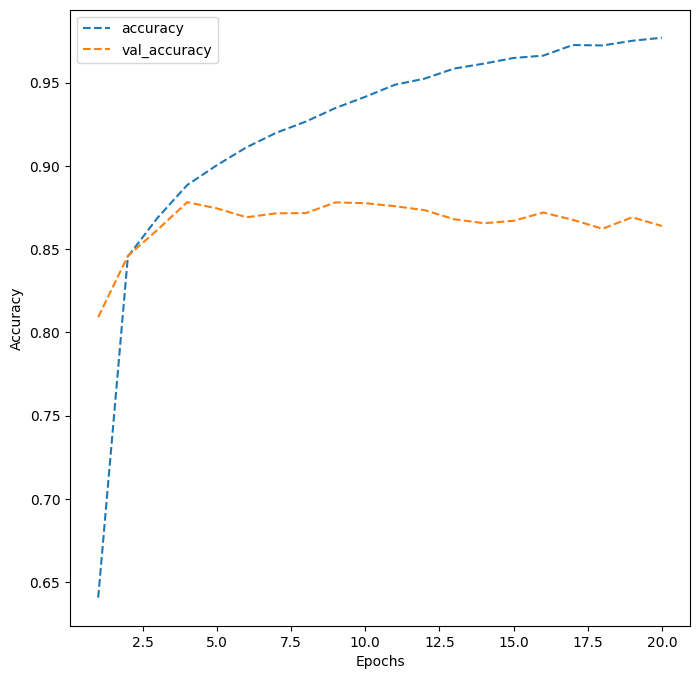

In [39]:
# Let's now plot the training and validation accuracies.

# As we did before, we extract the training history from the Keras model and store it in a dictionary.
dict_hist = history_cnn_model_1.history

# Let's create a list of all the epochs to run through
list_ep = [i for i in range(1, 21)]

# We can now create an area to plot the graph using MatPlotLib
plt.figure(figsize = (8, 8))

# Let's now plot the Accuracy in Blue
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

# We will now plot the second line 'Validation Accuracy' in Yellow
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

# We will set the label for the Y-axis as 'Accuracy'
plt.ylabel('Accuracy')

# We will set the label for the X-axis as 'Epochs'
plt.xlabel('Epochs')

# Let's also set a legend for the graph
plt.legend()

# Finally let's now plot the actual graph
plt.show()

**Observations:__________**

**1. Initial Training: Epochs 1-2:**

Blue Line (Training Accuracy): The rapid and then smooth increase in the training accuracy up to around 0.99 indicates that the model is learning well from the training data and is able to fit the training dataset quite well.

Yellow Line (Validation Accuracy): The validation accuracy increases for the first two epochs and this also indicates that the model is able to generalize  the validation set in the beginning.


**2. Fragmentation and Plateauing: Epochs 3-20:**

Validation Accuracy - Yellow Line: The validation accuracy framgments and plateaus from the third epoch, this indicates that the model is having difficulty  to generalize after a certain point. The model starts to plateau around 0.87 indicating that it is reaching a performance limit on unseen data, and then it might be starting to overfit the training dataset.

Training Accuracy - Blue Line: On the other hand, the training accuracy shows a smooth increase up to 0.99  and this suggests that the model is able to fit the training data well, but the decrease in the validation accuracy suggest that this may be due to overfitting.


**Potential Improvements:**
The model seems to be overfitting the training data. One notices this from  the large gap between training and validation accuracy. One can reduce or mitigate overfitting by ssing techniques such as dropout or regularization.

Another approach is to incorporate data augmentation i.e. to expose the model to a greater varity of examples during the model training process. This can also help the model to improving generalization and not to overfit.

In addition, once can also fine tune and test with different learning rates. A higher learning rate may cause the model to overshoot, while a lower learning rate might slow down the convergence significantly.

Architecture Complexity: One must also review the complexity of the model. If the model is too complex, it may memorize noise as a pattern instead of learning to recognize patterns.
Early Stopping: One other option is to stop the training early and to monitor the validation performance. For example, to stop the training when the validation performance starts to degrade, so as to prevent overfitting.


In summary, the large gap between the training accuracy and validation accuracy while the training accuracy continues to improve suggests that the model is overfitting. For now, I am going to reject this model as well.


We will now go ahead and build a different model and see if we can improve the model performance.

As we did before, let's  clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the Keras backend.

In [40]:
# Let's clear the Keras backend
backend.clear_session()

# Let's reset the seed
seed_setup()

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [42]:
# Here we will build a more complex CNN model and see if this can address the overfitting issue
from keras.layers import Conv2D, LeakyReLU, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from keras.optimizers import Adam

def cnn_model_2():
    model = Sequential()

    # First Convolutional layer as per Model Architecture
    # Let's add the first Convolutional layer with 16 filters and a kernel size of 3x3
    # Let's set the padding as 'same' and set the input shape = (32, 32, 1)
    # Let's add a LeakyRelu layer with  slope equal to 0.1
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))

    # Second Convolutional layer as per Model Architecture
    # Let's add a second Convolutional layer with 32 filters and a kernel size of 3x3 with 'same' padding
    # Let's add LeakyRelu with the slope equal to 0.1
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))


    # Let's add a max-pooling layer with a pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Let's add a BatchNormalization layer
    model.add(BatchNormalization())

    # Third Convolutional layer as per Model Architecture
    # Let's add a third Convolutional layer with 32 filters and a kernel size of 3x3 with 'same' padding
    # Let's add a LeakyRelu layer with the slope equal to 0.1
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))

    # Fourth Convolutional layer as per Model Architecture
    # Let's add a fourth Convolutional layer with 64 filters and a kernel size of 3x3 with 'same' padding
    # Let's add a LeakyRelu layer with the slope equal to 0.1
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(0.1))


    # Let's add a max-pooling layer with a pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Let's add a BatchNormalization layer
    model.add(BatchNormalization())

    # Let's flatten the output from the previous layer
    model.add(Flatten())

    # Dense layer as per Model Architecture
    # Let's add a dense layer with 32 nodes
    # Let's add a LeakyRelu layer with the slope equal to 0.1
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))

    # Let's add a dropout layer with the rate equal to 0.5
    model.add(Dropout(0.5))

    # Output layer as per Model Architecture
    # Let's add the final output layer with nodes equal to the total number of classes, i.e., 10
    # Let's use 'softmax' as the activation function
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    # Let's compile the model with the categorical_crossentropy loss
    # Let's use the Adam optimizer with learning_rate = 0.001, and metric equal to 'accuracy'.
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Builds the model
cnn_model_2 = cnn_model_2()

# Prints the model summary
cnn_model_2.summary()

# Fits the model (Assuming you have X_train, y_train as training data)
history_cnn_model_2 = cnn_model_2.fit(X_train, y_train,
                                      validation_split=0.2,
                                      batch_size=128,
                                      verbose=1,
                                      epochs=30)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

### **Plot the Training and Validation accuracies and write your observations.**

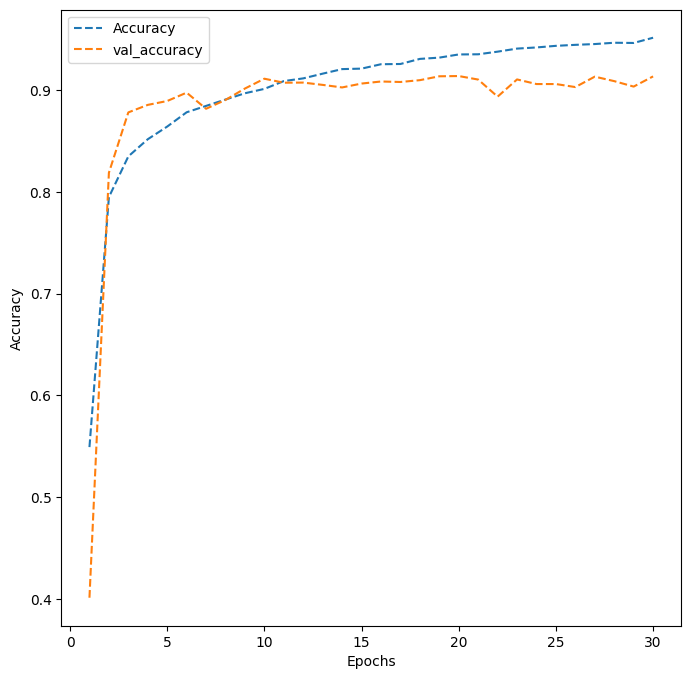

In [43]:
# Plotting the training and validation accuracies

# As we did before, we extract the training history from the Keras model and store it in a dictionary.
dict_hist = history_cnn_model_2.history

# Let's create a list of all the epochs to run through
list_ep = [i for i in range(1, 31)]

# We can now create an area to plot the graph using MatPlotLib
plt.figure(figsize = (8, 8))

# Let's now plot the Accuracy in Blue
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'Accuracy')

# We will now plot the second line 'Validation Accuracy' in Yellow
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

# We will set the label for the Y-axis as 'Accuracy'
plt.ylabel('Accuracy')

# We will set the label for the X-axis as 'Epochs'
plt.xlabel('Epochs')

# Let's also set a legend for the graph
plt.legend()

# Finally let's now plot the actual graph
plt.show()

**Observations:________**

**1. Initial Training:  Epochs 1-2:**
**Training/Validation Accuracy Lines:** Both the training and validation accuracies reach over 0.80 after the first two epochs. This indicates that the model learns quite fast and is also able to generalize quite well from the training data to the validation data.


**2. Training Phase: Epochs 3-30:**


**Training Accuracy - Blue Line:** The continuous and smooth increase in the training accuracy from epoch 3 and reaching almost 100% at the end of 30 epochs indicates that the model is able to fit the training data very well. Normally, the high training accuracy can be a sign of overfitting if the validation accuracy is not following the same trend.


**Validation Accuracy - Yellow Line:** The validation accuracy seems to initially plateau but stays around the blue line up to epoch 10. However,  from epoch 10 validation accuracy stabilizes with an accuracy of 0.91. The stability in the validation accuracy around 0.91 suggests that the model is able to generalize unseen data quite well.

**Observations and Considerations:**
**Overfitting:** Since both the training accuracy and the validation accuracy are relatively close and the vaidation accuracy plateaus and does not degrade, it suggest that overfitting is not a concern here.

**Plateau in Validation Accuracy:** Since validation accuracy plateaus
around 0.91, it suggests that the model may have reached the optimal performance level with the validation dataset. It is possible that further fine tuning may be possible,by adjusting the model architecture or fine tuning the hyperparameters.


**Potential Improvements:**

**Regularization:** To reduce overfitting, one can refine the dropout layers, change the batch normalization,and test if it improves.

**Learning Rate:** One could also look at adaptively adjusting the learning rate during training. This may help in convergence and stability.

**Model Complexity:** One could also review whether the model is too complex for the dataset. Here one can look at reducing the number of layers or neurons to see if this reduces overfitting.


**Summary:**
Overall, the model is able to quickly achieve high accuracy and overfitting seems to be not significant here. Further fine tuning could perhaps improve the model performance even more. Overall, we can see that both the CNN models performed better than the ANN model. In particular, the last CNN model clearly performed better than the others. So, I would recommend that we use this model.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [44]:
# Let's use the .predict method for the predictions
test_pred = cnn_model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 24s 42ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [45]:
# This changes the the matrix coded by one-hot-encoding back to the original labels
y_test = np.argmax(y_test, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1814
           1       0.92      0.89      0.91      1828
           2       0.93      0.91      0.92      1803
           3       0.91      0.88      0.90      1719
           4       0.96      0.90      0.93      1812
           5       0.91      0.91      0.91      1768
           6       0.92      0.88      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.87      0.91      0.89      1812
           9       0.88      0.93      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



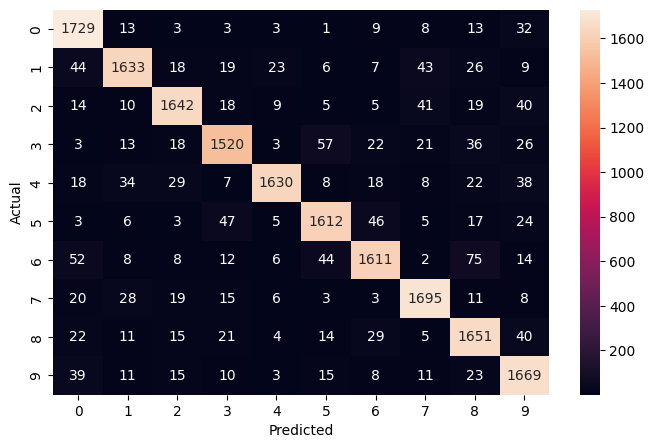

In [46]:
# Let's print the classification report using the sklearn method
print(classification_report(y_test, test_pred))

# Let's plot the heatmap using a confusion matrix from the sklearn method
cm = confusion_matrix(y_test, test_pred)

# Let's plot the confusion matrix
plt.figure(figsize = (8, 5))

# Let's use the seaborn library to display the heatmap
sns.heatmap(cm, annot = True,  fmt = '.0f')

# Assign the 'Actual' label to the Y-axis
plt.ylabel('Actual')

# Assign the 'Predicted' label to the X-axis
plt.xlabel('Predicted')

# Plot the result.
plt.show()

**Final Observations:_________**

**Precision, Recall, and F1-Score:**

**Precision:** We can see that this model performs much better than the previous ones. It has a much high lever of accuracy, for example, Class 0 has a a precision of 89%, which means that 89% of the time when the number was identified as 0 it was actually 0. If we look at Class 4, the precision is even better, 96% of the time when the number 4 was identified, it was actually 4.



**Recall:** We can also see that the recall is quite good. For example, for Class 0, 95% of the actual instances of 0 were correctly predicted. This is quite a good result.



**F1-Score:** If we look at the harmonized mean of precision and accuracy with the F1-Score, it also has quite a good result. For example, Classes 4 and 7, the F1-score is 0.93, this implies a good balance between both precision and recall.



**Support:** The support identifes the number of actual occurrences of each class within the specified dataset. For instance, there are 1814 instances of class 0 in the dataset.




**Accuracy**: The overall accuracy of this model across all classes is 91%, this means that the model  correctly classified 91% of the instances which is a very good result and is much better in comparison with the other models that we have already tried.



**Macro and Weighted Averages:** The average precision, recall, and F1-score calculated independently for each class and then averaged also are quite high at 0.91.



**Final Observations:**
This model architecture performs quite well and achieves high precision, recall, and F1-scores for most of the classes. This means that it is able to identify the classes quite accurately. Only in approximately 9% of the cases it has not classified correctly.
The model is also particularly good with classes 0, 2, 4, and 7.
It performs slightly lower with classes 8 and 9, with a lower precision.




**Potential Improvements:**

Further analysis is required as to why the model performs sub-optimally for certain classes. One could look at the dataset and check if there are any misclassified instances, or, one can also fine tune the model architecture and the hyperparameters.

Another option is also to look at other approaches such as ensemble methods to see if the performance could be improved further.



Overall, this CNN model, is significantly better than the previous models.

The model clearly shows a higher precision, recall, and F1-scores. Although further fine tuning can perhaps improve the model,  one could consider this model over the previous ones.



